<ipython-input-11-53a66b3ffd97>:21: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  A=imageio.imread('image1.png')/255
<ipython-input-11-53a66b3ffd97>:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  B=imageio.imread('image2.png')/255
<ipython-input-11-53a66b3ffd97>:40: RuntimeWarning: divide by zero encountered in true_divide
  yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])
<ipython-input-11-53a66b3ffd97>:43: RuntimeWarning: divide by zero encountered in true_divide
  yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])
Clipping

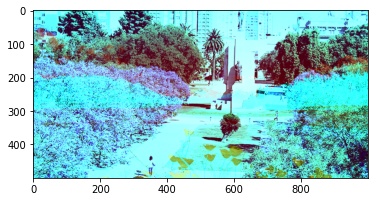

In [11]:

import numpy as np
import imageio
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageTk

import tkinter


ventana = tkinter.Tk()
ventana.geometry('600x400')
ventana.config(bg='white')
ventana.title('Aritmetica de imagenes')

#A=imageio.imread('image1.png')
#B=imageio.imread('image2.png')


       
def YIQpromedio():
    
    A=imageio.imread('image1.png')/255
    B=imageio.imread('image2.png')/255
    C = A + B
    yA=np.zeros(A.shape)
    yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
    yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
    yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

    yB=np.zeros(B.shape)
    yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
    yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
    yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]

    yC= np.zeros(C.shape)

    # YC := (YA + YB) / 2;
    yC[:,:,0]=(yA[:,:,0]+ yB[:,:,0])/2

    # IC := (YA * IA + YB * IB) / (YA + YB) ;
    yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

    # QC := (YA * QA + YB * QB) / (YA + YB) ;
    yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])

    plt.figure(1)
    plt.imshow(yC)
    plt.show()
    
    
def YIQclampeada():
    
    A=imageio.imread('image1.png')/255
    B=imageio.imread('image2.png')/255
    C = A + B
    yA=np.zeros(A.shape)
    yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
    yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
    yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

    yB=np.zeros(B.shape)
    yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
    yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
    yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]

    yC= np.zeros(C.shape)


    yC[:,:,0]= A[:,:,0]+ B[:,:,0]
    yC[:,:,0] = np.clip(yC[:,:,0], a_min=0, a_max=255)

    # IC := (YA * IA + YB * IB) / (YA + YB) ;
    yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

    # QC := (YA * QA + YB * QB) / (YA + YB) ;
    yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])


    plt.figure(4)
    plt.imshow(yC)
    plt.show()
    
    
def RGBclampeada():       
    
    A=imageio.imread('image1.png')/255
    B=imageio.imread('image2.png')/255
    C = A+B
    yA=np.zeros(A.shape)
    yA[:,:,0] = A[:,:,0]
    yA[:,:,1] = A[:,:,1]
    yA[:,:,2] = A[:,:,2]

    yB=np.zeros(B.shape)
    yB[:,:,0] = B[:,:,0]
    yB[:,:,1] = B[:,:,1] 
    yB[:,:,2] = B[:,:,2] 

    yC=np.zeros(C.shape)

    yC[:,:,0]= A[:,:,0]+ B[:,:,0]
    yC[:,:,0] = np.clip(yC[:,:,0], a_min=0, a_max=1)


    # IC := (YA * IA + YB * IB) / (YA + YB) ;
    yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

    # QC := (YA * QA + YB * QB) / (YA + YB) ;
    yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])

    image = ImageTk.PhotoImage(Image.open(yC))
    label = Label(image=imagen)
    label.pack()

    plt.figure(2)
    plt.imshow(yC)
    plt.show()
    
    
    
def RGBpromedio():
    
    A=imageio.imread('image1.png')/255
    B=imageio.imread('image2.png')/255
    C = A+B
    yA=np.zeros(A.shape)
    yA[:,:,0] = A[:,:,0]
    yA[:,:,1] = A[:,:,1]
    yA[:,:,2] = A[:,:,2]

    yB=np.zeros(B.shape)
    yB[:,:,0] = B[:,:,0]
    yB[:,:,1] = B[:,:,1] 
    yB[:,:,2] = B[:,:,2] 
    yC= np.zeros(C.shape)

    # YC := (YA + YB) / 2;
    yC[:,:,0]=(yA[:,:,0]+ yB[:,:,0])/2

    # IC := (YA * IA + YB * IB) / (YA + YB) ;
    yC[:,:,1]=((yA[:,:,0]*yA[:,:,1])+(yB[:,:,0]+yB[:,:,1]))/(yA[:,:,0]+yA[:,:,1])

    # QC := (YA * QA + YB * QB) / (YA + YB) ;
    yC[:,:,2]=((yA[:,:,0]*yA[:,:,2])+(yB[:,:,0]+yB[:,:,2]))/(yA[:,:,0]+yA[:,:,1])


    plt.figure(2)
    plt.imshow(yC)
    plt.show()

def Ifligther():
    
    A=imageio.imread('image1.png')/255
    B=imageio.imread('image2.png')/255
    C = A + B
    yA=np.zeros(A.shape)
    yA[:,:,0] = 0.229*A[:,:,0] + 0.587*A[:,:,1] + 0.114*A[:,:,2]
    yA[:,:,1] = 0.595716*A[:,:,0] - 0.274453*A[:,:,1] - 0.321263*A[:,:,2]
    yA[:,:,2] = 0.211456*A[:,:,0] - 0.522591*A[:,:,1] + 0.311135*A[:,:,2]

    yB=np.zeros(B.shape)
    yB[:,:,0] = 0.229*B[:,:,0] + 0.587*B[:,:,1] + 0.114*B[:,:,2]
    yB[:,:,1] = 0.595716*B[:,:,0] - 0.274453*B[:,:,1] - 0.321263*B[:,:,2]
    yB[:,:,2] = 0.211456*B[:,:,0] - 0.522591*B[:,:,1] + 0.311135*B[:,:,2]
  
    yC=np.zeros(C.shape) 
    yC[:,:,0]=0.229*C[:,:,0]+0.587*C[:,:,1]+0.114*C[:,:,2]
    yC[:,:,1]=0.595716*C[:,:,0]-0.274453*C[:,:,1]-0.321263*C[:,:,2]
    yC[:,:,2]=0.211456*C[:,:,0]-0.522591*C[:,:,1]+0.311135*C[:,:,2]
  
  
    h=yA[:,:,0] > yB[:,:,0]
    bandera=np.all(h == True)
    if bandera==True:
       yC[:,:,0]= yA[:,:,0]
       yC[:,:,1]= yA[:,:,1]
       yC[:,:,2]= yA[:,:,2]
    else:        
      yC[:,:,0]= yB[:,:,0]        
      yC[:,:,1]= yB[:,:,1]      
      yC[:,:,2]= yB[:,:,2]

    plt.figure(5)
    plt.imshow(yC)
    plt.show()
    
def productoImagenes():
    img1 = Image.open('image1.png')
    img2 = Image.open('image2.png')
    img3 = ImageChops.multiply(img1,img2)
    plt.figure(6)
    plt.imshow(img3)
    plt.show()
    

def divisionImagenes():

    B=imageio.imread('image2.png')
    A=imageio.imread('image1.png')
    C = A+B
    yA=np.zeros(A.shape)
    yA[:,:,0] = A[:,:,0] 
    yA[:,:,1] = A[:,:,1]
    yA[:,:,2] = A[:,:,2] 

    yB=np.zeros(B.shape)
    yB[:,:,0] = B[:,:,0] 
    yB[:,:,1] = B[:,:,1] 
    yB[:,:,2] = B[:,:,2] 

    yC= np.zeros(C.shape)

    yC[:,:,0] = ( yA[:,:,0] / yB[:,:,0] )
    yC[:,:,1] = ( yA[:,:,1] / yB[:,:,1] )
    yC[:,:,2] = ( yA[:,:,2] / yB[:,:,2] )

    plt.figure(8)
    plt.imshow(yC)
    plt.show()
    
boton1 = tkinter.Button(ventana, text = 'YIQ PROMEDIO', command = YIQpromedio)
boton1.place(x=10,y=100)
boton1.config(bg='#21d')
boton2 = tkinter.Button(ventana, text = 'YIQ CLAMPEADA', command = YIQclampeada)
boton2.place(x=150,y=100)
boton2.config(bg='#21d')
boton3 = tkinter.Button(ventana, text = 'RGB CLAMPEADA', command = RGBclampeada)
boton3.place(x=300,y=100)
boton3.config(bg='#21d')
boton4 = tkinter.Button(ventana, text = 'RGB PROMEDIO', command = RGBpromedio)
boton4.place(x=10,y=200)
boton4.config(bg='#21d')
boton5 = tkinter.Button(ventana, text = 'Ifligther', command = Ifligther)
boton5.place(x=150,y=200)
boton5.config(bg='#21d')
boton6 = tkinter.Button(ventana, text = 'Producto', command = productoImagenes)
boton6.place(x=300,y=200)
boton6.config(bg='#21d')
boton7 = tkinter.Button(ventana, text = 'Division', command = divisionImagenes)
boton7.place(x=10,y=300)
boton7.config(bg='#21d')
        
ventana.mainloop()
        
